In [20]:
%matplotlib inline
import pandas as pd
data = pandas.read_csv("train.csv", index_col = "PassengerId")

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [5]:
data["Fare"].value_counts().head()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
Name: Fare, dtype: int64

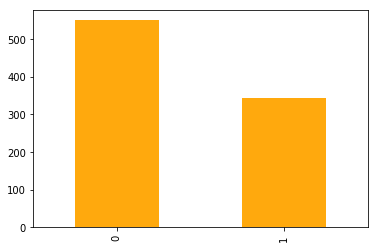

In [6]:
data['Survived'].value_counts().plot(kind='bar', color="orange", alpha=.95)

In [7]:
import math, numpy as np

In [8]:
data["Fare"].head()

PassengerId
1     7.2500
2    71.2833
3     7.9250
4    53.1000
5     8.0500
Name: Fare, dtype: float64

In [9]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
len(data[data["Survived"] == 1])/len(data)*100

38.38383838383838

In [11]:
len(data[data["Pclass"] == 1])/len(data)*100

24.242424242424242

In [12]:
data["Age"].mean()

29.69911764705882

In [13]:
data["Age"].median()

28.0

In [14]:
data.corr()["SibSp"]["Parch"]

0.41483769862015263

In [15]:
women_names = data[data["Sex"] == "female"]["Name"]

In [16]:
names = list(women_names.values)

In [17]:
s = []
# ex = []
abbrs = ["Miss.", "Mrs.", "Mlle.", "Mme.", "Ms."]
for name in names:
    begin = name.find("(")
    if begin > 0:
        s.append(name[begin + 1 : name.find(" ", begin)])
        continue;
    words = name.split()
    for abbr in abbrs:
        if abbr in words:
            s.append(words[words.index(abbr) + 1])
            break;
#     if set(words).intersection(set(abbrs)) == set():
#         ex.append(name)
print(s)
print(s[max(map(lambda name : [s.count(name), s.index(name)], s))[1]])
print(sorted(s, key = lambda u : s.count(u), reverse=True))

['Florence', 'Laina', 'Lily', 'Elisabeth', 'Adele', 'Marguerite', 'Elizabeth', 'Hulda', 'Mary', 'Emelia', 'Fatima', 'Anna', 'Torborg', 'Selma', 'Ellen', 'Marie', 'Mary', 'Augusta', 'Jamila', 'Johanna', 'Dorothy', 'Simonne', 'Margaret', 'Bridget', 'Josefine', 'Myna', 'Elizabeth', 'Emily', 'Constance', 'Amelie', 'Elizabeth', 'Erna', 'Lillian', 'Elizabeth', 'Brigdet', 'Bertha', 'Maria', 'Mabel', 'Ada', 'Matilda', 'Anna', 'Bertha', 'Hileni', 'Katriina', 'Malake', 'Ellis', 'Susan', 'Anna', 'Grace', 'Mathilde', 'Helen', 'Sultana', 'Anna', 'Elin', 'Robina', 'Edith', 'Katherine', 'Elizabeth', 'Edith', 'Anna', 'Eleanor', 'Ann', 'Constance', 'Luise', 'Johanna', 'Rosa', 'Carla', 'Margaret', 'Elise', 'Margaret', '"Mrs', 'Telma', 'Helen', 'Clear', 'Madeleine', 'Eliina', 'Albina', 'Mathilde', 'Irene', 'Lillian', 'Alice', 'Marjorie', 'Thamine', 'Katherine', 'Agda', 'Anna', 'Elna', 'Helena', 'Hanne', 'Gertrude', 'Gladys', 'Anna', 'Lutie', 'Delia', 'Edith', 'Amelia', 'Elizabeth', 'Hanora', 'Kornelia', 

In [18]:
from sklearn.tree import DecisionTreeClassifier
new_data = data[["Pclass", "Fare", "Age", "Sex", "Survived"]].dropna(subset=["Age"]).replace(["male", "female"], [0, 1])
final_data = new_data.drop("Survived", axis=1)
result = new_data["Survived"]
result
dtc = DecisionTreeClassifier(random_state=241)
dtc.fit(final_data, result)
importances = dtc.feature_importances_
print(importances)
print(" ".join(map(str,sorted(importances, reverse=True)[:2])))
final_data.head()

[0.14751816 0.29538468 0.25658495 0.30051221]
0.3005122109582393 0.2953846784065746


,Pclass,Fare,Age,Sex
PassengerId,,,,
1,3,7.2500,22.0,0
2,1,71.2833,38.0,1
3,3,7.9250,26.0,1
4,1,53.1000,35.0,1
5,3,8.0500,35.0,0


d:\program files\python\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


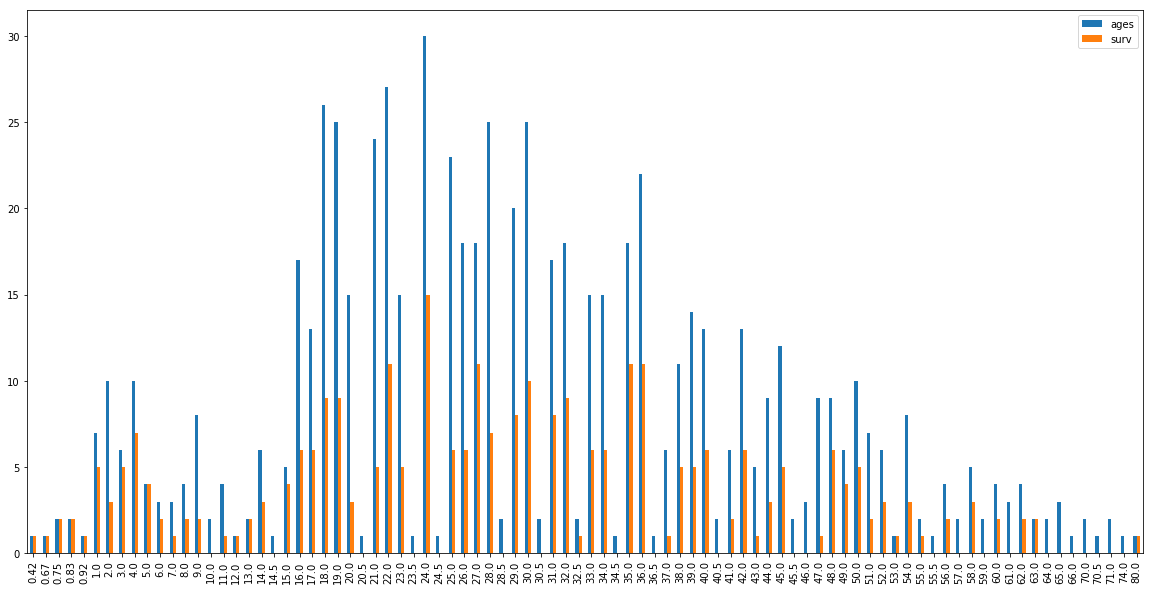

In [33]:
import matplotlib as mpl
ages = new_data["Age"].value_counts()
surv = [len(new_data[new_data["Age"] == age][new_data["Survived"] == 1]) for age in ages.index]
graph = pd.DataFrame({"ages" : ages, "surv" : surv}).sort_index()
graph.plot(kind = "bar", figsize = (20,10))

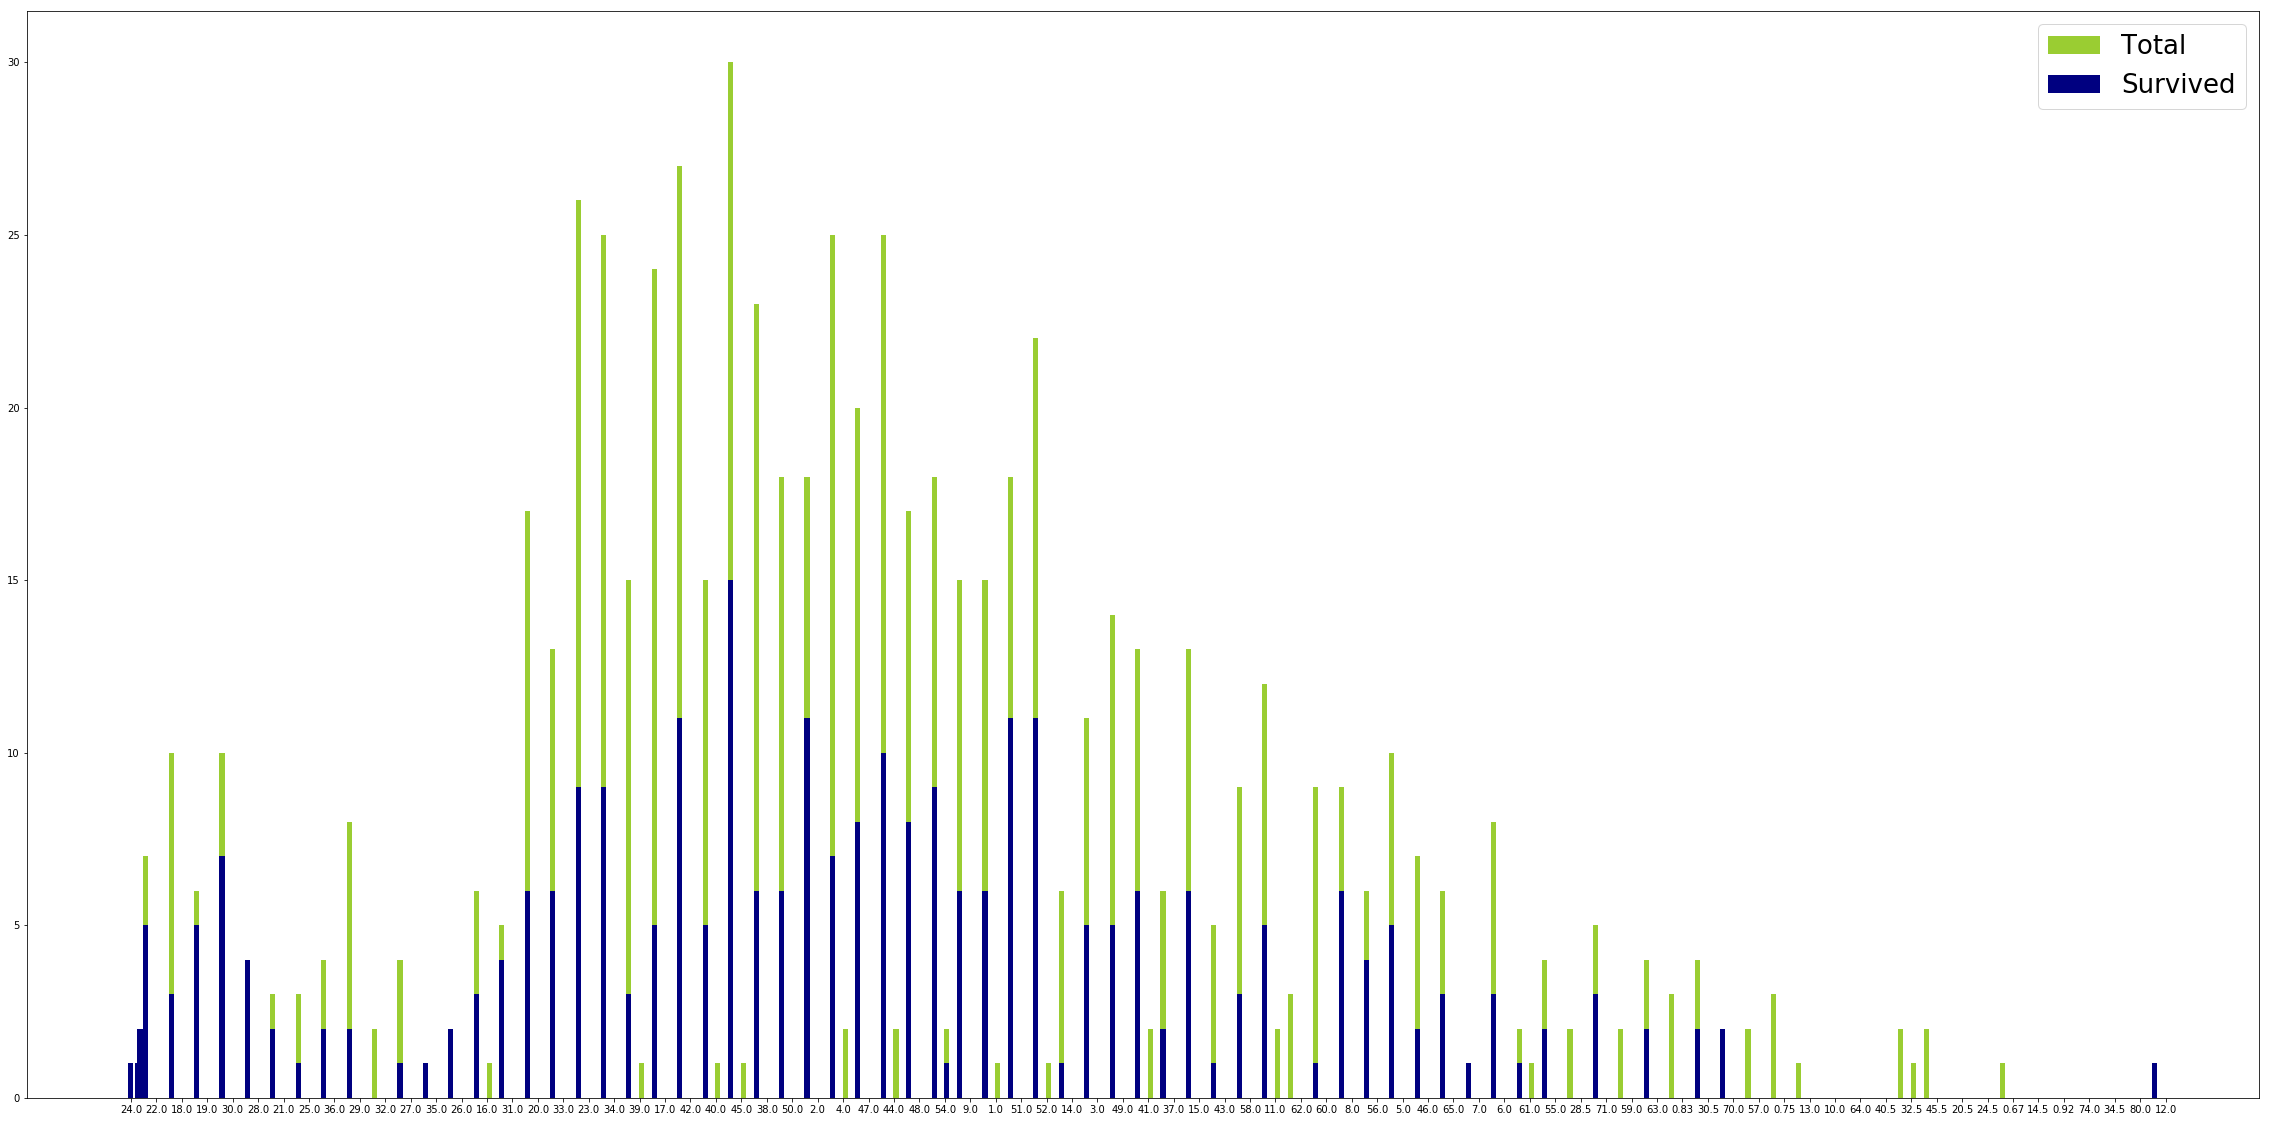

In [83]:
import matplotlib.pyplot as plt
# line_X = np.arange(0, 100)[:, np.newaxis]
# line_X
# ages.keys
# ages.values()
plt.figure(figsize = (40,20))
plt.bar(ages.keys(), ages.values, color='yellowgreen', label="Total", width=0.2)
plt.bar(ages.keys(), surv, color = 'navy', label="Survived", width=0.2)
plt.legend(loc="upper right", prop = {'size' : 26})
plt.xticks(np.arange(min(ages.keys()), max(ages.keys())+1, 1.0), ages.keys())
plt.show()